# Sheet 7

### problem 1

In [14]:
import numpy as np
from matplotlib import pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from IPython.display import Image

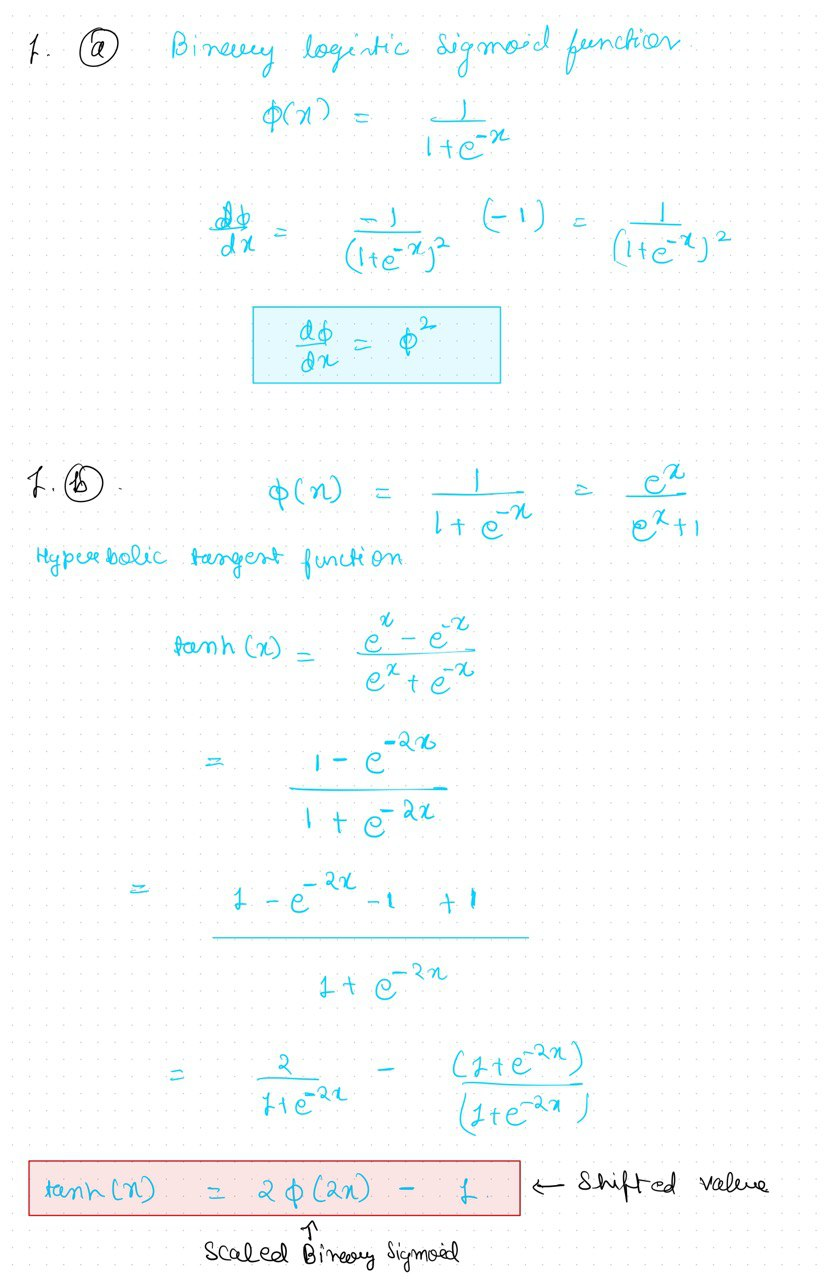

In [15]:
Image(filename='1.jpg') 

## 2 Log-sum-exp and soft(arg)max
(b)

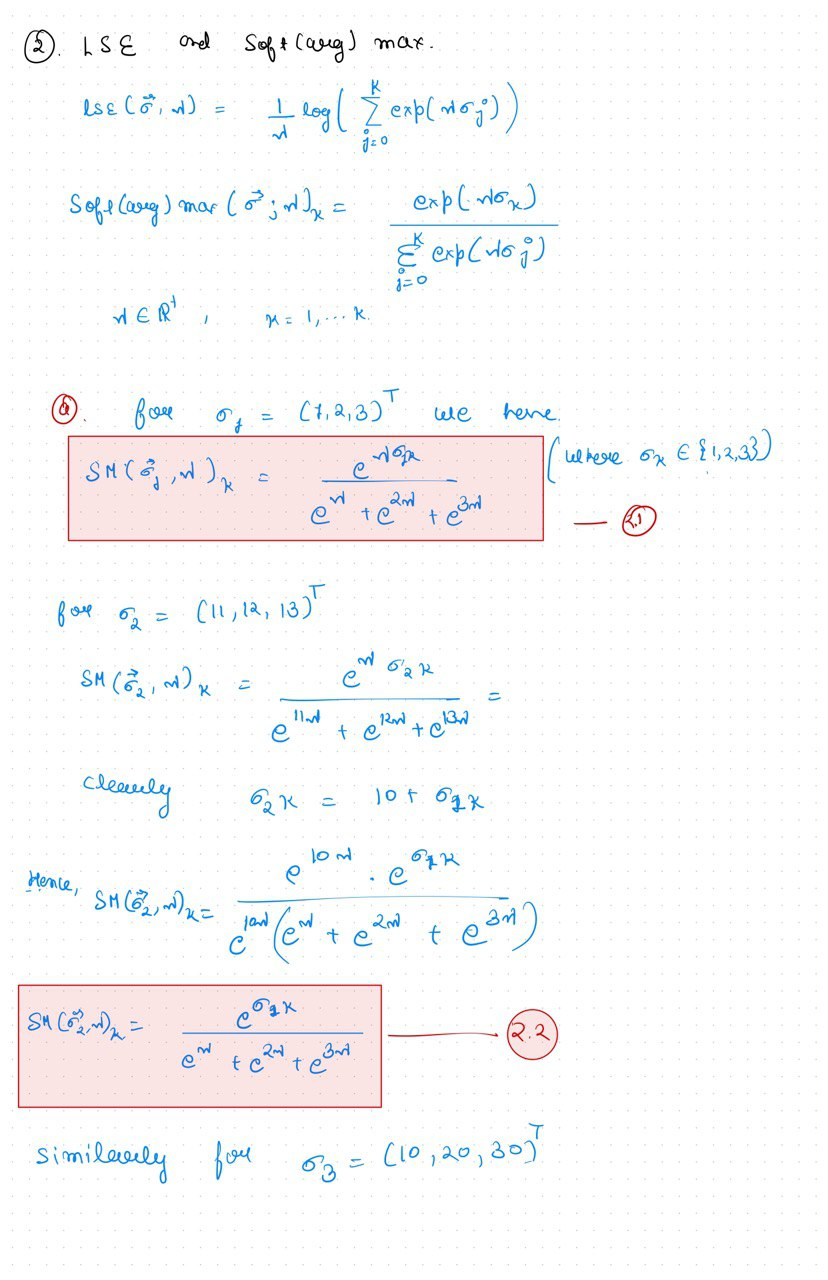

In [16]:
Image("2.1.jpg")


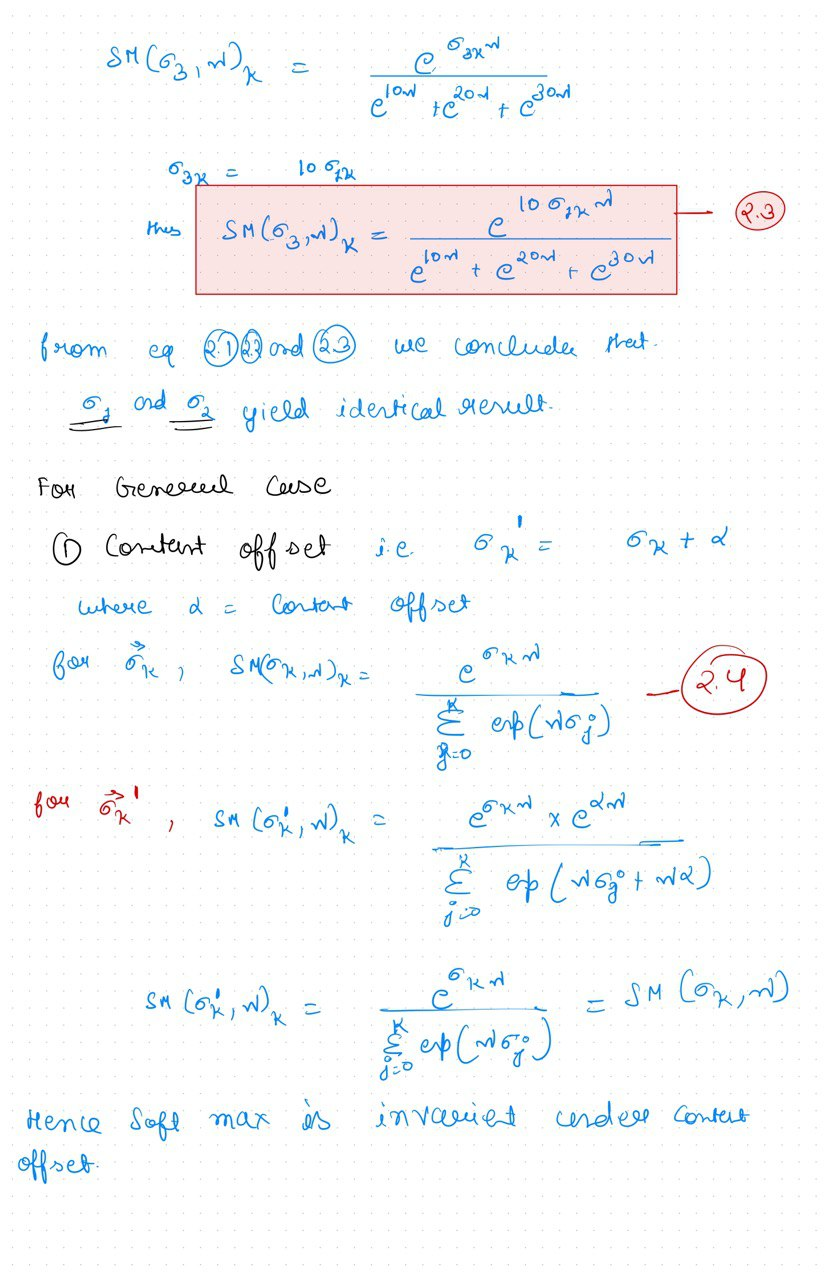

In [17]:
Image(filename='2.2.jpg') 

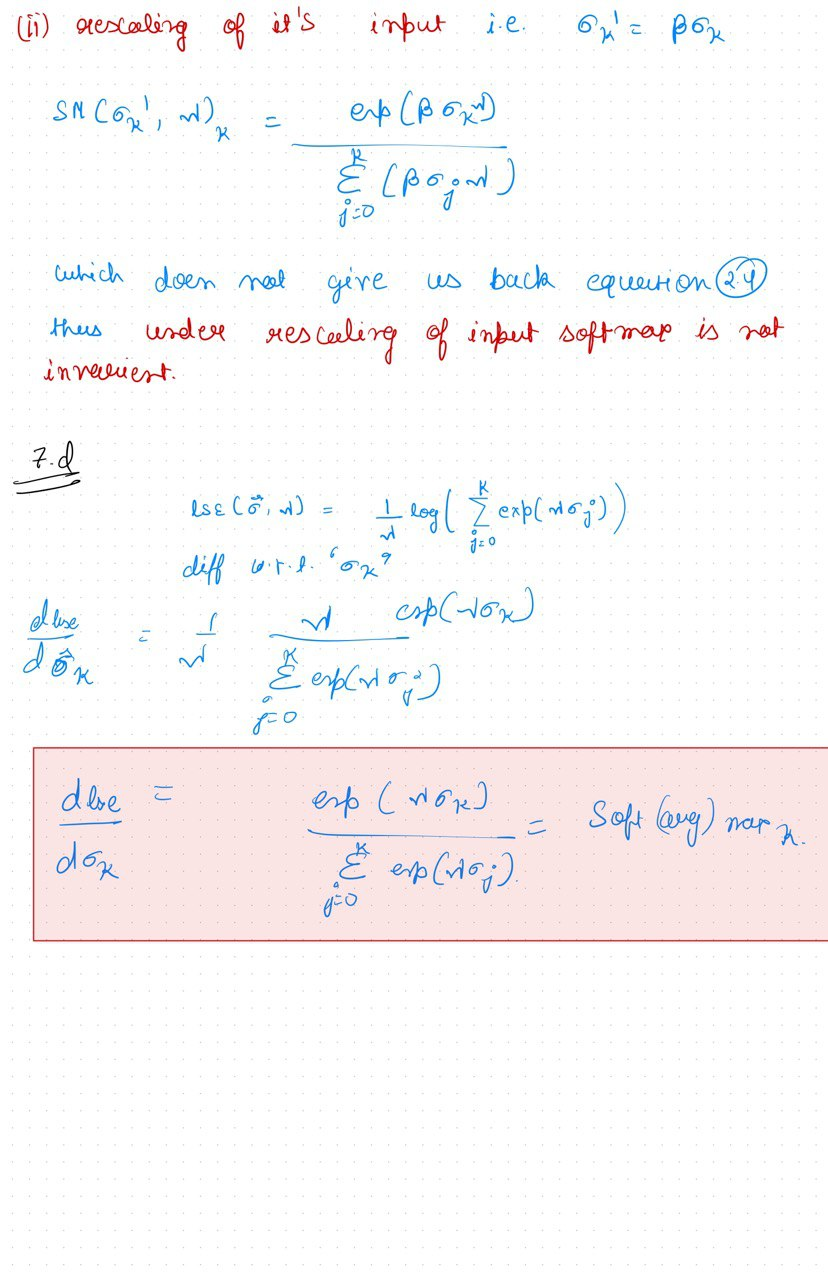

In [18]:
Image(filename='2.3.jpg') 

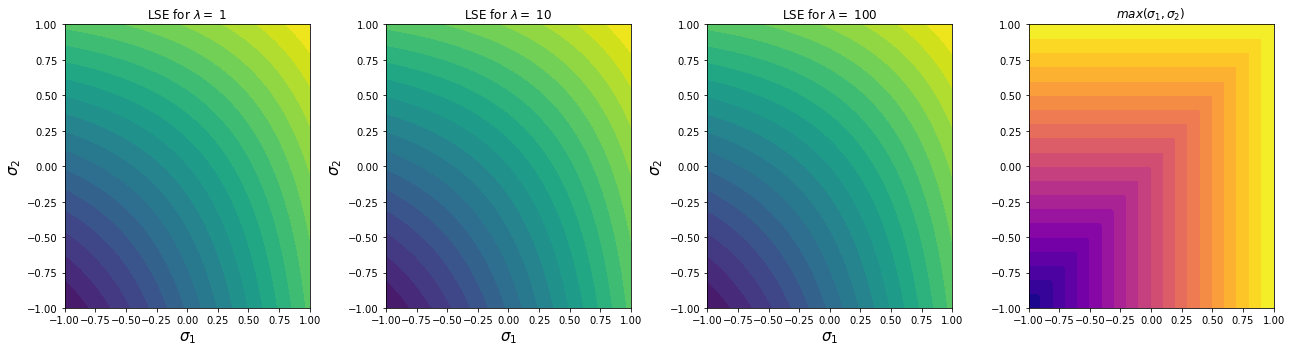

In [19]:
def logsumexp(x, lamb):
    """ input 
    x- is a meshgrid vector obtained by the command np.meshgrid(x,y)
    output - log sum exp
    
    """
    
    # TODO: implement the logsumexp

    lse =  np.log(np.sum(np.exp(lamb*x),axis = 0))/lamb  ## since x is a 3d vector sum is first taken upon axis = 0
    return lse


# TODO: set up a grid of points in [-1, 1] x [-1, 1]


# TODO: I recommend you set up a function to set up an Axes object with the correct x, y labels, 
#       equal aspect and maybe x and y ticks.

def set_up_axes(ax):
    
    ax.set_xlabel(r'$\sigma_1$',size = 15)
    ax.set_ylabel(r'$\sigma_2$',size = 15)

    
# TODO: calculate and plot the functions as specified in the task



xlist = np.linspace(-1, 1.0, 100)  ##creating xlists and ylists from -1 to 3 and taking 100 points in between
ylist = np.linspace(-1, 1.0, 100)   ##creating ylists as above
sigmas = np.meshgrid(xlist, ylist)  ##creating meshgrid


sig1 = sigmas[0]
sig2 = sigmas[1]

fig,axs = plt.subplots(ncols = 4,figsize = (18,5))


lamb_array = [1,10,100]


for i in range (len(lamb_array)):
    lamb = lamb_array[i]

    lse = logsumexp(sigmas,lamb = lamb)
    
    axs[i].contourf(sigmas[0],sigmas[1],lse.reshape(sigmas[0].shape),20)
    axs[i].set_title(r'LSE for $\lambda = $ ' + str(lamb))
    set_up_axes(axs[i])
    

##function for max(sig1,sig2)
max_s1s2 = np.max(sigmas,axis = 0).reshape(sigmas[0].shape)
axs[3].contourf(sig1,sig2,max_s1s2.reshape(sigmas[0].shape),20, cmap = 'plasma')
axs[3].set_title(r'$max(\sigma_1,\sigma_2)$')

plt.tight_layout()

plt.show()

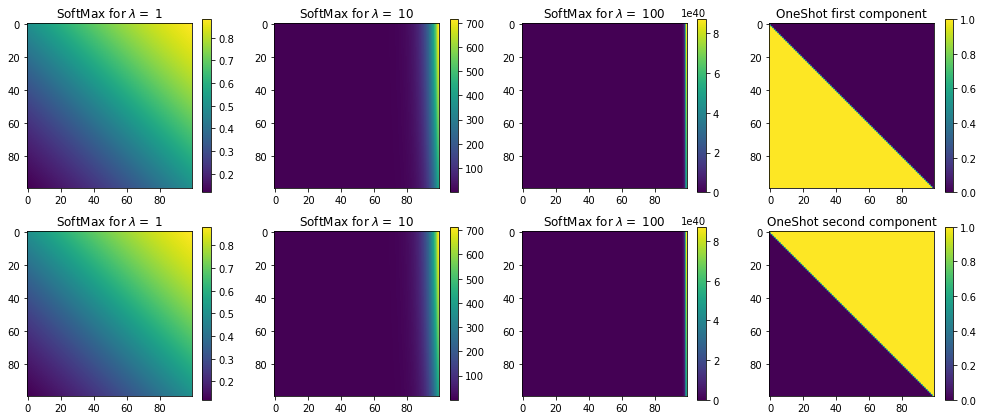

In [20]:
def softmax(x, axis, lamb=1):
    """
    input :
    x is a meshgrid vector obtained by the command np.meshgrid(x,y)
    axis - represents the component of the soft max ie either sigma 1 or sigma2 - axis = 0 means sigma 1 
    output :
    components of a softmax for all the grid points for a particular axis
    """
    
    # TODO: implement the softmax function. Axis should specify along which axis the sums should be computed.
    denominator_sum = np.sum(np.exp(lamb*x),axis = 0)  ##finding the sum of soft max
    numerator =  np.exp(lamb*x[axis])  ##finding exponent for a particular axis
    return numerator/denominator_sum; 


        
# TODO: compute the argmax of each gridpoint in one-hot form
# onehot_argmax = to_onehot(np.argmax(xy, axis=-1))


# plot the softmax
fig, axs = plt.subplots(2, 4, figsize=(17, 7))




# TODO: make the plots as specified on the sheet (nicest is in a grid which you can get using plt.subplots)
  #3figure out where numpu




# onehot_first = onehot[index]



for i in range (len(lamb_array)):
    lamb = lamb_array[i]

    sfm1 = softmax(sigmas,0,lamb = lamb)
    sfm2 = softmax(sigmas,1,lamb = lamb)



    im = axs[0,i].imshow(sfm1)
    axs[0,i].set_title(r'SoftMax for $\lambda = $ ' + str(lamb))
    plt.colorbar(im,ax = axs[0,i])
    im2 = axs[1,i].imshow(sfm1)
    axs[1,i].set_title(r'SoftMax for $\lambda = $ ' + str(lamb))
    plt.colorbar(im2,ax = axs[1,i])




    



        
# plot the onehot argmax


##creating 2d vector like meshgrid it has a shape 2*100*100  
a,b = sigmas[0].shape
onehot =  np.zeros(len(sigmas)*sigmas[0].size).reshape(2,a,b)


index1 = np.where(sig1<sig2)
index2 = np.where(sig1>=sig2)

onehot[0][index1] = 1
onehot[1][index2] = 1


im = axs[0,3].imshow(onehot[0])
axs[0,3].set_title(r'OneShot first component')
plt.colorbar(im,ax = axs[0,3])
im2 = axs[1,3].imshow(onehot[1])
axs[1,3].set_title(r'OneShot second component')
plt.colorbar(im2,ax = axs[1,3])

plt.show()




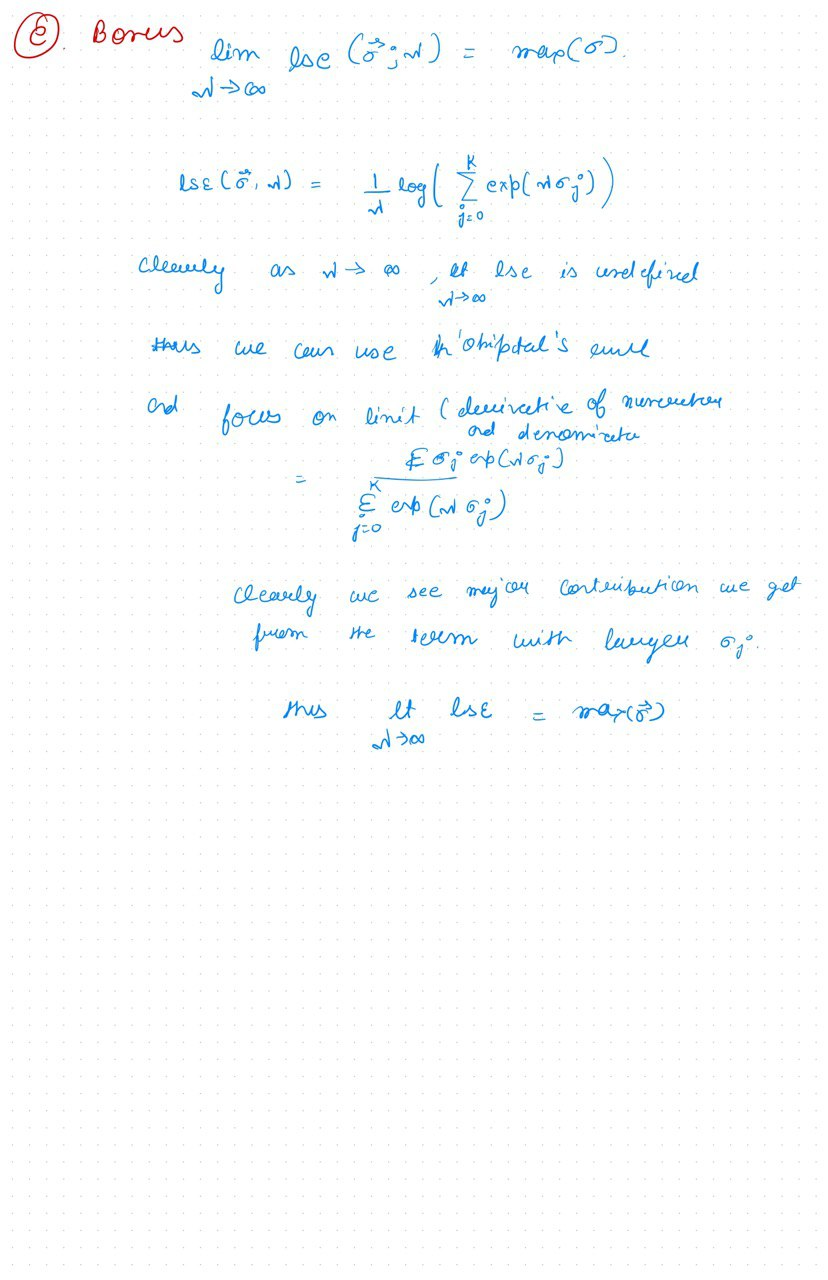

In [21]:
Image(filename='2.4.jpg') 